# ACTIVIDAD 2b -Mamdani- (opcional - puntuación extra)

Un docente le solicita que automatice el proceso de puntuación de su materia. La materia consta de un único examen, puntuado entre 0 y 100, y además una nota de concepto con tres valores (regular, bueno, excelente). 

Diseñe un FIS Mamdani que permita modificar la nota final (1-10) combinando ambas variables de entrada.
Recuerde que la nota de concepto sólo modula la nota del examen. Es decir, la nota del examen tiene más peso en el resultado final que el concepto. No obstante, la nota de concepto debe influir en la puntuación final.
Explicite las reglas que ha elegido para esta tarea, y dé ejemplos de valores de entrada y salida.

In [14]:
#!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


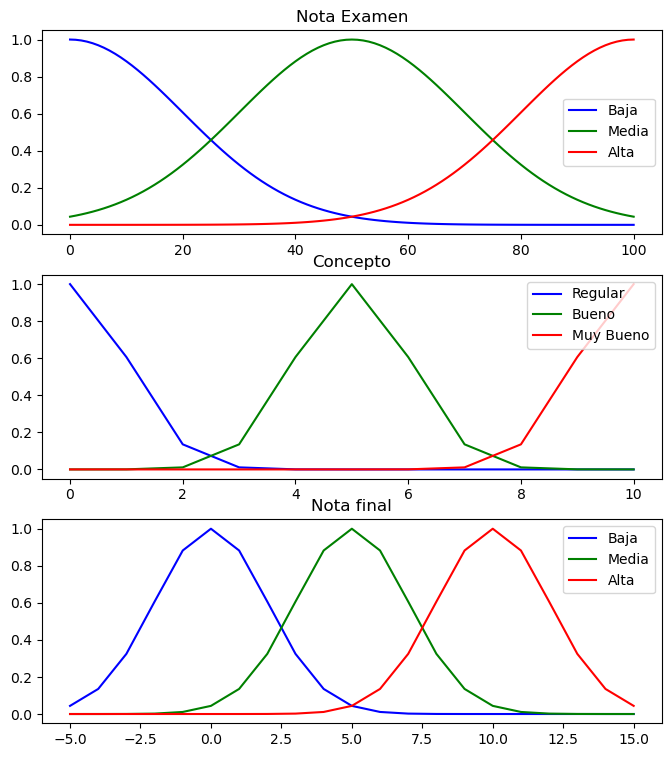

In [31]:
# Generar variables
#   trafico (vehiculos/min)
#   cantidad de personas en el cruce

#nota de 0 a 100
x_nota = np.arange(0, 101, 1)
#concepto (regular, bueno, excelente)
x_concepto = np.arange(0, 11, 1)
#Calificacion final
x_final = np.arange(-5, 16, 1) 


#Generar funciones de pertenencia
nota_lo = fuzz.gaussmf(x_nota, 0, 20)
nota_md = fuzz.gaussmf(x_nota, 50, 20)
nota_hi = fuzz.gaussmf(x_nota, 100, 20)

# regular = fuzz.trimf(x_concepto, [0, 0, 1])
# bueno = fuzz.trimf(x_concepto, [3, 5.5, 7])
# muybueno = fuzz.trimf(x_concepto, [7, 10, 10])
regular = fuzz.gaussmf(x_concepto, 0, 1)
bueno = fuzz.gaussmf(x_concepto, 5, 1)
muybueno = fuzz.gaussmf(x_concepto, 10, 1)


final_lo = fuzz.gaussmf(x_final, 0, 2)
final_md = fuzz.gaussmf(x_final, 5, 2)
final_hi = fuzz.gaussmf(x_final, 10, 2)



# Graficar funciones
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_nota, nota_lo, 'b', linewidth=1.5, label='Baja')
ax0.plot(x_nota, nota_md, 'g', linewidth=1.5, label='Media')
ax0.plot(x_nota, nota_hi, 'r', linewidth=1.5, label='Alta')
ax0.set_title('Nota Examen')
ax0.legend()

ax1.plot(x_concepto, regular, 'b', linewidth=1.5, label='Regular')
ax1.plot(x_concepto, bueno, 'g', linewidth=1.5, label='Bueno')
ax1.plot(x_concepto, muybueno, 'r', linewidth=1.5, label='Muy Bueno')
ax1.set_title('Concepto')
ax1.legend()

ax2.plot(x_final, final_lo, 'b', linewidth=1.5, label='Baja')
ax2.plot(x_final, final_md, 'g', linewidth=1.5, label='Media')
ax2.plot(x_final, final_hi, 'r', linewidth=1.5, label='Alta')
ax2.set_title('Nota final')
ax2.legend()

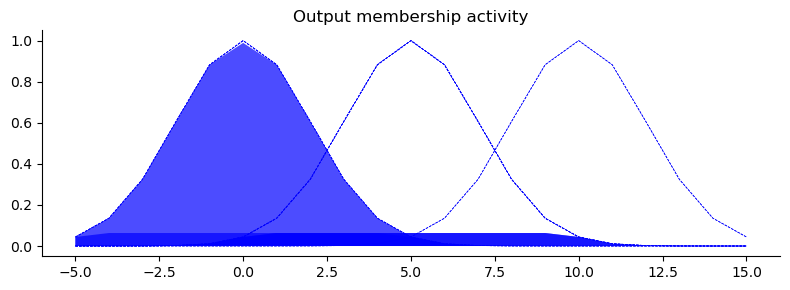

In [42]:
#Evaluar puntos
value_nota = 3
#regular = 0, bueno = 5, muy bueno = 10
value_concepto = 5

nota_level_lo = fuzz.interp_membership(x_nota, nota_lo, value_nota)
nota_level_md = fuzz.interp_membership(x_nota, nota_md, value_nota)
nota_level_hi = fuzz.interp_membership(x_nota, nota_hi, value_nota)

concepto_level_lo = fuzz.interp_membership(x_concepto, regular, value_concepto)
concepto_level_md = fuzz.interp_membership(x_concepto, bueno, value_concepto)
concepto_level_hi = fuzz.interp_membership(x_concepto, muybueno, value_concepto)

#Nota alta
#Regla 1: nota alta AND concepto muy bueno then -> final alta
active_rule1 = np.fmax(nota_level_hi, concepto_level_hi)
final_activation_1 = np.fmin(active_rule1, final_hi)
#Regla 2: nota alta AND concepto bueno then -> final alta
active_rule2 = nota_level_hi
final_activation_2 = np.fmin(active_rule2, final_hi)
#Regla 3: nota alta AND concepto regular then -> final media
active_rule3 = np.fmin(nota_level_hi, concepto_level_lo)
final_activation_3 = np.fmin(active_rule3, final_md)

#Nota media
#Regla 1: nota media AND concepto muy bueno then -> final media
active_rule4 = np.fmax(nota_level_md, concepto_level_hi)
final_activation_4 = np.fmin(active_rule4, final_md)
#Regla 2: nota media AND concepto bueno then -> final media
active_rule5 = nota_level_md
final_activation_5 = np.fmin(active_rule5, final_md)
#Regla 3: nota media AND concepto regular then -> final media
active_rule6 = np.fmin(nota_level_md, concepto_level_lo)
final_activation_6 = np.fmin(active_rule6, final_md)

#Nota baja
#Regla 1: nota baja AND concepto muy bueno then -> final baja
active_rule7 = np.fmax(nota_level_lo, concepto_level_hi)
final_activation_7 = np.fmin(active_rule7, final_lo)
#Regla 2: nota baja AND concepto bueno then -> final baja
active_rule8 = nota_level_md
final_activation_8 = np.fmin(active_rule8, final_lo)
#Regla 3: nota baja AND concepto regular then -> final baja
active_rule9 = np.fmin(nota_level_lo, concepto_level_lo)
final_activation_9 = np.fmin(active_rule9, final_lo)

final0 = np.zeros_like(x_final)

# Visualizar
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_final, final0, final_activation_1, facecolor='b', alpha=0.7)
ax0.plot(x_final, final_hi, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(x_final, final0, final_activation_2, facecolor='b', alpha=0.7)
ax0.plot(x_final, final_hi, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(x_final, final0, final_activation_3, facecolor='b', alpha=0.7)
ax0.plot(x_final, final_md, 'b', linewidth=0.5, linestyle='--', )

###

ax0.fill_between(x_final, final0, final_activation_4, facecolor='b', alpha=0.7)
ax0.plot(x_final, final_md, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(x_final, final0, final_activation_5, facecolor='b', alpha=0.7)
ax0.plot(x_final, final_md, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(x_final, final0, final_activation_6, facecolor='b', alpha=0.7)
ax0.plot(x_final, final_md, 'b', linewidth=0.5, linestyle='--', )

###

ax0.fill_between(x_final, final0, final_activation_7, facecolor='b', alpha=0.7)
ax0.plot(x_final, final_lo, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(x_final, final0, final_activation_8, facecolor='b', alpha=0.7)
ax0.plot(x_final, final_lo, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(x_final, final0, final_activation_9, facecolor='b', alpha=0.7)
ax0.plot(x_final, final_lo, 'b', linewidth=0.5, linestyle='--', )

# ax0.fill_between(x_tiempo, tiempo0, tiempo_activation_md, facecolor='g', alpha=0.7)
# ax0.plot(x_tiempo, tiempo_md, 'g', linewidth=0.5, linestyle='--')
# ax0.fill_between(x_tiempo, tiempo0, tiempo_activation_hi, facecolor='r', alpha=0.7)
# ax0.plot(x_tiempo, tiempo_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [ ]:
#Evaluar puntos
value_nota = 3
#regular = 0, bueno = 5, muy bueno = 10
value_concepto = 5
concep = {
    "muybueno":1.3,
    "bueno":1,
    "regular":0.7
}

nota_level_lo = fuzz.interp_membership(x_nota, nota_lo, value_nota)
nota_level_md = fuzz.interp_membership(x_nota, nota_md, value_nota)
nota_level_hi = fuzz.interp_membership(x_nota, nota_hi, value_nota)

concepto_level_lo = fuzz.interp_membership(x_concepto, regular, value_concepto)
concepto_level_md = fuzz.interp_membership(x_concepto, bueno, value_concepto)
concepto_level_hi = fuzz.interp_membership(x_concepto, muybueno, value_concepto)

#Concepto Muy bueno
#Regla 1: nota alta AND concepto muy bueno then -> final alta
active_rule1 = nota_level_hi * concep["muybueno"]
final_activation_1 = np.fmin(active_rule1, final_hi)
#Regla 2: nota md AND concepto muy bueno then -> final alta
active_rule2 = nota_level_md * concep["muybueno"]
final_activation_2 = np.fmin(active_rule1, final_hi)
#Regla 3: nota md AND concepto muy bueno then -> final alta
active_rule3 = nota_level_lo * concep["muybueno"]
final_activation_3 = np.fmin(active_rule1, final_hi)


#Regla 2: nota alta AND concepto muy bueno -> final alta
active_rule2 = nota_level_hi concep["bueno"]
final_activation_2 = np.fmin(active_rule2, final_hi)
#Regla 3: nota alta AND concepto muy bueno then -> final media
active_rule3 = np.fmin(nota_level_hi, concepto_level_lo)
final_activation_3 = np.fmin(active_rule3, final_md)



final0 = np.zeros_like(x_final)

# Visualizar
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_final, final0, final_activation_1, facecolor='b', alpha=0.7)
ax0.plot(x_final, final_hi, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(x_final, final0, final_activation_2, facecolor='b', alpha=0.7)
ax0.plot(x_final, final_hi, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(x_final, final0, final_activation_3, facecolor='b', alpha=0.7)
ax0.plot(x_final, final_md, 'b', linewidth=0.5, linestyle='--', )

###

ax0.fill_between(x_final, final0, final_activation_4, facecolor='b', alpha=0.7)
ax0.plot(x_final, final_md, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(x_final, final0, final_activation_5, facecolor='b', alpha=0.7)
ax0.plot(x_final, final_md, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(x_final, final0, final_activation_6, facecolor='b', alpha=0.7)
ax0.plot(x_final, final_md, 'b', linewidth=0.5, linestyle='--', )

###

ax0.fill_between(x_final, final0, final_activation_7, facecolor='b', alpha=0.7)
ax0.plot(x_final, final_lo, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(x_final, final0, final_activation_8, facecolor='b', alpha=0.7)
ax0.plot(x_final, final_lo, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(x_final, final0, final_activation_9, facecolor='b', alpha=0.7)
ax0.plot(x_final, final_lo, 'b', linewidth=0.5, linestyle='--', )

# ax0.fill_between(x_tiempo, tiempo0, tiempo_activation_md, facecolor='g', alpha=0.7)
# ax0.plot(x_tiempo, tiempo_md, 'g', linewidth=0.5, linestyle='--')
# ax0.fill_between(x_tiempo, tiempo0, tiempo_activation_hi, facecolor='r', alpha=0.7)
# ax0.plot(x_tiempo, tiempo_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()